In [1]:
#negative Hamiltonian

import kwant
from matplotlib import pyplot
import math
import numpy as np
import matplotlib.pyplot as plt

#here, we create the cubic bilayer. 


def make_Hamn(m):
    '''
    The builder for the negative spin-orbit parity SrRuO3 Hamiltonian. m is magnetization (in the Stoner model sense).
    '''
    lat = kwant.lattice.Polyatomic([(1,0),(0,1)],[(0.01,0),(0.02,0),(0.03,0)],norbs=1)
    a,b,c = lat.sublattices
    hz=m
    lam=-0.2
    tp=-1.0
    tp2=-0.16
    
    syst = kwant.Builder(kwant.TranslationalSymmetry(*lat.prim_vecs))
    syst[a.shape(lambda pos: True, (0.01, 0))]=hz
    syst[b.shape(lambda pos: True, (0.02, 0))]=hz
    syst[c.shape(lambda pos: True, (0.03, 0))]=-hz
    #SOC
    syst[kwant.builder.HoppingKind((0, 0),a,b)]=-1j*lam
    syst[kwant.builder.HoppingKind((0, 0),a,c)]=-1j*lam
    syst[kwant.builder.HoppingKind((0, 0),b,a)]=1j*lam
    syst[kwant.builder.HoppingKind((0, 0),b,c)]=-lam
    syst[kwant.builder.HoppingKind((0, 0),c,a)]=1j*lam
    syst[kwant.builder.HoppingKind((0, 0),c,b)]=-lam
    #NN
    syst[kwant.builder.HoppingKind((1, 0),a,a)]=tp
    syst[kwant.builder.HoppingKind((0, 1),c,c)]=tp
    syst[kwant.builder.HoppingKind((0, 1),b,b)]=tp
    syst[kwant.builder.HoppingKind((1, 0),c,c)]=tp
    syst[kwant.builder.HoppingKind((-1, 0),a,a)]=tp
    syst[kwant.builder.HoppingKind((0, -1),c,c)]=tp
    syst[kwant.builder.HoppingKind((0, -1),b,b)]=tp
    syst[kwant.builder.HoppingKind((-1, 0),c,c)]=tp
    #NNN
    syst[kwant.builder.HoppingKind((1, 1),a,b)]=tp2
    syst[kwant.builder.HoppingKind((-1, -1),a,b)]=tp2
    syst[kwant.builder.HoppingKind((1, -1),a,b)]=-tp2
    syst[kwant.builder.HoppingKind((-1, 1),a,b)]=-tp2
    syst[kwant.builder.HoppingKind((1, 1),b,a)]=tp2
    syst[kwant.builder.HoppingKind((-1, -1),b,a)]=tp2
    syst[kwant.builder.HoppingKind((1, -1),b,a)]=-tp2
    syst[kwant.builder.HoppingKind((-1, 1),b,a)]=-tp2
    
    return syst

In [2]:
#positive Hamiltonian (the time-reversal partner)

def make_Hamp(m):
    '''
    The builder for the positive spin-orbit parity SrRuO3 Hamiltonian. m is magnetization (in the Stoner model sense).
    '''
    lat = kwant.lattice.Polyatomic([(1,0),(0,1)],[(0.01,0),(0.02,0),(0.03,0)],norbs=1)
    a,b,c = lat.sublattices
    hz=m
    lam=-0.2
    tp=-1.0
    tp2=-0.16
    
    syst = kwant.Builder(kwant.TranslationalSymmetry(*lat.prim_vecs))
    syst[a.shape(lambda pos: True, (0.01, 0))]=hz
    syst[b.shape(lambda pos: True, (0.02, 0))]=-hz
    syst[c.shape(lambda pos: True, (0.03, 0))]=-hz
    #SOC
    syst[kwant.builder.HoppingKind((0, 0),a,b)]=1j*lam
    syst[kwant.builder.HoppingKind((0, 0),a,c)]=lam
    syst[kwant.builder.HoppingKind((0, 0),b,a)]=-1j*lam
    syst[kwant.builder.HoppingKind((0, 0),b,c)]=1j*lam
    syst[kwant.builder.HoppingKind((0, 0),c,a)]=lam
    syst[kwant.builder.HoppingKind((0, 0),c,b)]=-1j*lam
    #NN
    syst[kwant.builder.HoppingKind((0, 1),a,a)]=tp
    syst[kwant.builder.HoppingKind((1, 0),b,b)]=tp
    syst[kwant.builder.HoppingKind((1, 0),a,a)]=tp
    syst[kwant.builder.HoppingKind((0, 1),c,c)]=tp
    syst[kwant.builder.HoppingKind((0, -1),a,a)]=tp
    syst[kwant.builder.HoppingKind((-1, 0),b,b)]=tp
    syst[kwant.builder.HoppingKind((-1, 0),a,a)]=tp
    syst[kwant.builder.HoppingKind((0, -1),c,c)]=tp
    #NNN
    syst[kwant.builder.HoppingKind((1, 1),c,b)]=tp2
    syst[kwant.builder.HoppingKind((-1, -1),c,b)]=tp2
    syst[kwant.builder.HoppingKind((1, -1),c,b)]=-tp2
    syst[kwant.builder.HoppingKind((-1, 1),c,b)]=-tp2
    syst[kwant.builder.HoppingKind((1, 1),b,c)]=tp2
    syst[kwant.builder.HoppingKind((-1, -1),b,c)]=tp2
    syst[kwant.builder.HoppingKind((1, -1),b,c)]=-tp2
    syst[kwant.builder.HoppingKind((-1, 1),b,c)]=-tp2
    
    return syst

In [3]:
def make_Ham_2nd(m): #in the new basis
    '''
    The builder for the entire SrRuO3 Hamiltonian. m is magnetization (in the Stoner model sense).
    '''
    lat = kwant.lattice.Polyatomic([(1,0),(0,1)],[(0.01,0),(0.02,0),(0.03,0),(0.04,0),(0.05,0),(0.06,0)],norbs=1)
    a,b,c,d,e,f = lat.sublattices
    hz=m
    lam=-0.2
    tp=-1.0
    tp2=-0.16
    
    syst = kwant.Builder(kwant.TranslationalSymmetry(*lat.prim_vecs))
    #Hamn
    syst[a.shape(lambda pos: True, (0.01, 0))]=hz
    syst[b.shape(lambda pos: True, (0.02, 0))]=hz
    syst[c.shape(lambda pos: True, (0.03, 0))]=-hz
    #SOC
    syst[kwant.builder.HoppingKind((0, 0),a,b)]=-1j*lam
    syst[kwant.builder.HoppingKind((0, 0),a,c)]=-1j*lam
    syst[kwant.builder.HoppingKind((0, 0),b,a)]=1j*lam
    syst[kwant.builder.HoppingKind((0, 0),b,c)]=-lam
    syst[kwant.builder.HoppingKind((0, 0),c,a)]=1j*lam
    syst[kwant.builder.HoppingKind((0, 0),c,b)]=-lam
    #NN
    syst[kwant.builder.HoppingKind((1, 0),a,a)]=tp
    syst[kwant.builder.HoppingKind((0, 1),c,c)]=tp
    syst[kwant.builder.HoppingKind((0, 1),b,b)]=tp
    syst[kwant.builder.HoppingKind((1, 0),c,c)]=tp
    syst[kwant.builder.HoppingKind((-1, 0),a,a)]=tp
    syst[kwant.builder.HoppingKind((0, -1),c,c)]=tp
    syst[kwant.builder.HoppingKind((0, -1),b,b)]=tp
    syst[kwant.builder.HoppingKind((-1, 0),c,c)]=tp
    #NNN
    syst[kwant.builder.HoppingKind((1, 1),a,b)]=tp2
    syst[kwant.builder.HoppingKind((-1, -1),a,b)]=tp2
    syst[kwant.builder.HoppingKind((1, -1),a,b)]=-tp2
    syst[kwant.builder.HoppingKind((-1, 1),a,b)]=-tp2
    syst[kwant.builder.HoppingKind((1, 1),b,a)]=tp2
    syst[kwant.builder.HoppingKind((-1, -1),b,a)]=tp2
    syst[kwant.builder.HoppingKind((1, -1),b,a)]=-tp2
    syst[kwant.builder.HoppingKind((-1, 1),b,a)]=-tp2
    #Hamp
    syst[d.shape(lambda pos: True, (0.04, 0))]=hz
    syst[e.shape(lambda pos: True, (0.05, 0))]=-hz
    syst[f.shape(lambda pos: True, (0.06, 0))]=-hz
    #SOC
    syst[kwant.builder.HoppingKind((0, 0),d,e)]=1j*lam
    syst[kwant.builder.HoppingKind((0, 0),d,f)]=lam
    syst[kwant.builder.HoppingKind((0, 0),e,d)]=-1j*lam
    syst[kwant.builder.HoppingKind((0, 0),e,f)]=1j*lam
    syst[kwant.builder.HoppingKind((0, 0),f,d)]=lam
    syst[kwant.builder.HoppingKind((0, 0),f,e)]=-1j*lam
    #NN
    syst[kwant.builder.HoppingKind((0, 1),d,d)]=tp
    syst[kwant.builder.HoppingKind((1, 0),e,e)]=tp
    syst[kwant.builder.HoppingKind((1, 0),d,d)]=tp
    syst[kwant.builder.HoppingKind((0, 1),f,f)]=tp
    syst[kwant.builder.HoppingKind((0, -1),d,d)]=tp
    syst[kwant.builder.HoppingKind((-1, 0),e,e)]=tp
    syst[kwant.builder.HoppingKind((-1, 0),d,d)]=tp
    syst[kwant.builder.HoppingKind((0, -1),f,f)]=tp
    #NNN
    syst[kwant.builder.HoppingKind((1, 1),f,e)]=tp2
    syst[kwant.builder.HoppingKind((-1, -1),f,e)]=tp2
    syst[kwant.builder.HoppingKind((1, -1),f,e)]=-tp2
    syst[kwant.builder.HoppingKind((-1, 1),f,e)]=-tp2
    syst[kwant.builder.HoppingKind((1, 1),e,f)]=tp2
    syst[kwant.builder.HoppingKind((-1, -1),e,f)]=tp2
    syst[kwant.builder.HoppingKind((1, -1),e,f)]=-tp2
    syst[kwant.builder.HoppingKind((-1, 1),e,f)]=-tp2
    
    return syst

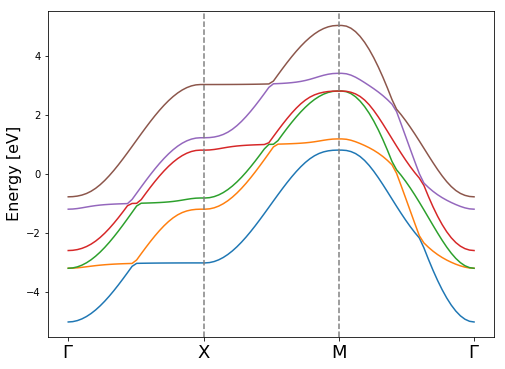

In [4]:
import scipy
def hs_2d(sys,pr):
    '''
    Visualize the band structure along the tetragonal high-symmetry points. sys expects an unfinalized builder with at least one 
    translational symmetry. pr is the precision of the visualization.
    '''
    syst=kwant.wraparound.wraparound(sys,keep=None).finalized()    
    lat_ndim, space_ndim = syst._wrapped_symmetry.periods.shape #checks shape
    if lat_ndim != 2:
        raise ValueError("Expected a system with a 2D translational symmetry.")
    if space_ndim != lat_ndim:
        raise ValueError("Lattice dimension must equal realspace dimension.")
        
    B = np.array(syst._wrapped_symmetry.periods).T #lattice vectors
    A = B.dot(np.linalg.inv(B.T.dot(B)))#reciprocal lattice vectors
        
    z=[0]
    p=[np.pi]
    mp=[-np.pi]
    ztopi=np.linspace(0,np.pi,pr)
    ztompi=np.linspace(0,-np.pi,pr)
    pitoz=np.linspace(np.pi,0,pr)
    mpitoz=np.linspace(-np.pi,0,pr)
    
    #the path is gamma-->x-->M-->gamma
    #define gamma-->x, x-->M, M-->gamma
    def energy(kx, ky,b_n):
        k = np.array([kx, ky])
        kx, ky = np.linalg.solve(A, k)
        H = syst.hamiltonian_submatrix([kx, ky], sparse=False)
        m=scipy.linalg.eigh(H)[0]
        return m[b_n]
    def energies(pathx,pathy,band_number):
        es=np.array([[[energy(kx, ky,band_number) for kx in pathx] for ky in pathy]])
        return es
    def per_band(band):
        gtx=energies(ztopi,z,band)[0][0]
        xtom=energies(p,ztompi,band)[0]
        #mtog requires more finesse. we need to pick out the 30 points where for kx[i],ky[j], i==j.
        mtog_t=energies(pitoz,mpitoz,band)[0]
        egs=[]
        for i in range(len(pitoz)):
            b=mtog_t[i][i]
            egs.append(b)
        mtog=egs
        path=[]
        for i in gtx:
            path.append(i)
        for j in xtom:
            jj=j[0]
            path.append(jj)
        for l in mtog:
            path.append(l) 
        return path
    xaxis=np.linspace(0,3*pr,3*pr)
    fig, ax = plt.subplots(figsize=(8,6))
    #plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax.plot(xaxis,per_band(0))
    ax.plot(xaxis,per_band(1))
    ax.plot(xaxis,per_band(2))
    ax.plot(xaxis,per_band(3))
    ax.plot(xaxis,per_band(4))
    ax.plot(xaxis,per_band(5))
    plt.ylabel('Energy [eV]',fontsize=16)
    ax.xaxis.set_ticks([0,pr,2*pr,3*pr])
    ax.xaxis.set_ticklabels(['$\Gamma$','X','M','$\Gamma$'],fontsize=18)
    plt.axvline(x=pr,linestyle='--',color='gray')    
    plt.axvline(x=2*pr,linestyle='--',color='gray')
    plt.savefig('sro_mzn05wsoc.eps', format='eps',bbox_inches='tight')
    
    plt.show()


hs_2d(make_Ham_2nd(-1),30)

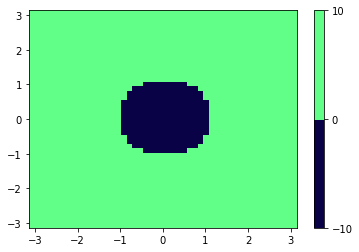

In [5]:
import scipy
#cmap of fermi level per band
import matplotlib
def cmap_perorb(mzn,ksp,band_number):
    '''
    Visualization of which points in the first Brillouin zone are above the Fermi level. mzn chooses a value of magnetization,
    ksp the number of squares discretizing the BZ, and band_number the scipy band chosen.
    '''
    sys=make_Ham_2nd(m=mzn)
    
    B = np.array(sys.symmetry.periods).T
    ks=np.linspace(-np.pi, np.pi, ksp,endpoint=True)
    A = B @ np.linalg.inv(B.T @ B)
    syst=kwant.wraparound.wraparound(sys).finalized()
    def egy_point(kx,ky,band_number):
        k = np.array([kx, ky])
        kx, ky = np.linalg.solve(A, k)
        H = syst.hamiltonian_submatrix([kx, ky], sparse=False)
        m=scipy.linalg.eigh(H)[0]
        mbn=m[(band_number):(band_number+1)]
        return mbn
    
    emap=np.array([[egy_point(kx, ky,band_number) for kx in ks] for ky in ks])
    emap_n=[]
    for ei in emap:
        for ej in ei:
            ej=ej[0]
            emap_n.append(ej) 
    def epo(kx,ky):
        l=len(kx)
        egy=np.zeros([l,l])
        for i,xel in enumerate(kx):
            for j,yel in enumerate(ky):
                eff=emap_n[j*ksp+i]
                egy[i][j]=eff
        return egy
    def plt_cmap(kx,ky):
        
        levels = [-10,0,10]
        colors = ['#0a0247','#61ff87']
        cm, nm = matplotlib.colors.from_levels_and_colors(levels, colors)
        fig, ax = plt.subplots()
        im=ax.pcolormesh(kx, ky, epo(kx,ky),cmap=cm,norm=nm)
        fig.colorbar(im, ax=ax)
        plt.show()
    return plt_cmap(ks,ks)

cmap_perorb(1,50,5)

In [6]:
import scipy
#generate the matrices!
def gen_EVS_permzn(mzn,ksp):
    '''
    We want a matrix where each entry is associated to a point in 2d k-space. Each point has a vector of EV and ES in orbital basis.
    '''
    sys=make_Ham_2nd(m=mzn)
    B = np.array(sys.symmetry.periods).T
    A = B @ np.linalg.inv(B.T @ B)
    syst=kwant.wraparound.wraparound(sys).finalized()
    
    def energy_norm(kx, ky):
        k = np.array([kx, ky])
        kx, ky = np.linalg.solve(A, k)
        H = syst.hamiltonian_submatrix([kx, ky], sparse=False)
        m=scipy.linalg.eigh(H)
        return m 
    
    def k_mats(prec):
        long_ks=np.linspace(-np.pi, np.pi, prec,endpoint=False) #endpoint=False requires putting ar,ad back in.
        dupl=[1 for i in range(prec)]
        ky_ks=np.kron(long_ks,dupl)
        kx_ks=np.kron(dupl,long_ks)
        k2=prec*prec
        return ky_ks,kx_ks,k2
    
    ky_ks,kx_ks,k2=k_mats(ksp)
    evs=[energy_norm(kx_ks[u], ky_ks[u]) for u in range(k2)] #bigcalc
    
    ev=[evs[i][0] for i in range(k2)]
    es=[evs[i][1] for i in range(k2)]
    
    return ev,es

def gen_EVS(mznprec,ksp):
    '''
    Here we generate the supermatrices of the EV and ES (array of matrices) for several magnetization values. mznprec 
    determines the length of this array.
    '''
    
    if mznprec%2!=0:
        mazn=[-1]#np.linspace(-2,2,mznprec)
    else:
        mazn=[-1]#np.linspace(-2,2,mznprec+1) #the +1 is to account for the 0 in the middle
    supermatrix=[gen_EVS_permzn(m,ksp=ksp) for m in mazn] #bigcalc
    ev_supermatrix=[supermatrix[i][0] for i in range(len(mazn))]
    es_supermatrix=[supermatrix[i][1] for i in range(len(mazn))]
    return ev_supermatrix,es_supermatrix

evsmat=gen_EVS(1,300)

In [7]:
def gen_spaces():
    '''
    Necessary for fermi_surface_atm_pb but quicker to pull out of the function and execute only once
    '''
    ks=int(np.sqrt(len(evsmat[0][0])))#recuperate ksp
    sgs=range(ks)
    limit_right=[pp*ks-1 for pp in sgs]#keep the last point out
    limit_down=[ks*(ks)+i for i in [-ks+j for j in range(ks-1)]]
    anls_right=np.array([iks for iks in range(ks*ks) if iks in limit_right])
    anls_down=np.array([iks for iks in range(ks*ks) if iks in limit_down])
    new_linspace=np.array([iks for iks in range(ks*ks) if iks not in limit_right and iks not in limit_down and iks != (ks*ks-1)])
    nl_x=new_linspace+1
    nl_y=new_linspace+ks
    nl_xy=new_linspace+ks+1
    ad_y=anls_down-ks*(ks-1)
    ad_xy=anls_down-ks*(ks-1)+1
    ad_x=anls_down+1
    ar_y=anls_right+ks
    ar_x=anls_right-ks+1
    ar_xy=anls_right+1
    return anls_right,anls_down,new_linspace,nl_x,nl_y,nl_xy,ad_x,ad_y,ad_xy,ar_x,ar_y,ar_xy
ar,ad,nl,nl_x,nl_y,nl_xy,ad_x,ad_y,ad_xy,ar_x,ar_y,ar_xy=gen_spaces()

In [9]:
import scipy
def fermi_surface_atm_pb(evsmat,mzn,b_n,level_high=0,level_low=-1000):
    '''
    Berry curvature and anomalous conductivity calculation. evsmat is the EV,ES vector, mzn the magnetization, b_n the band number,
    level_high includes states below this energy level, and level_low those above.
    '''
    ev,es=evsmat

    ev=ev[mzn]#all k-points, w all bands
    prec=int(np.sqrt(len(ev)))
    k2=len(ev) 
    ev=[ev[i][b_n] for i in range(k2)]
    ev=np.array(ev)    
        
    def squares(v1,v2,v3,v4):
        sumev=ev[v1]+ev[v2]+ev[v3]+ev[v4]
        [new]=np.where((sumev<level_high) & (sumev>level_low))
        return v1[new]
    
    newnl=squares(nl,nl_x,nl_y,nl_xy)
    newar=squares(ar,ar_x,ar_y,ar_xy)
    newad=squares(ad,ad_x,ad_y,ad_xy)
    
    t_v=es[mzn]#all k-points, w all bands
    t_v=[t_v[i][:,b_n:b_n+1] for i in range(k2)]
    t_v=np.array(t_v)
    
    def b_c(ind,indx,indy,indxy):
        fa_1=np.sum(t_v[ind].conj()*t_v[indx],1)# k and k+kx
        fa_2=np.sum(t_v[indx].conj()*t_v[indxy],1) #k+kx and k+kx+ky
        fa_3=np.sum(t_v[indxy].conj()*t_v[indy],1) #k+kx+ky and k+ky
        fa_4=np.sum(t_v[indy].conj()*t_v[ind],1) #k+ky and k
        fa=fa_1*fa_2*fa_3*fa_4
        pn=np.angle(fa)
        pn=np.mod(pn+np.pi/2,np.pi)-np.pi/2
        pn=np.transpose(pn)[0]
        return pn
        
    pn_nl=b_c(newnl,newnl+1,newnl+prec,newnl+prec+1)
    pn_ar=b_c(newar,newar-prec+1,newar+prec,newar+1)
    pn_ad=b_c(newad,newad+1,newad-prec*(prec-1),newad-prec*(prec-1)+1)
    last=b_c([k2-1],[ad[0]],[ar[0]],[nl[0]])[0]
        
    #shape into a mat so that it can be used for visual representations
    vect=np.zeros(k2)
    vect[newnl]=pn_nl
    vect[newar]=pn_ar
    vect[newad]=pn_ad
    vect[-1]=last
    mat=np.reshape(vect,(prec,prec))
    return mat,sum(vect)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
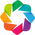

In [10]:
import holoviews as hv
hv.extension('matplotlib','bokeh')

:Surface   [x,y]   (z)
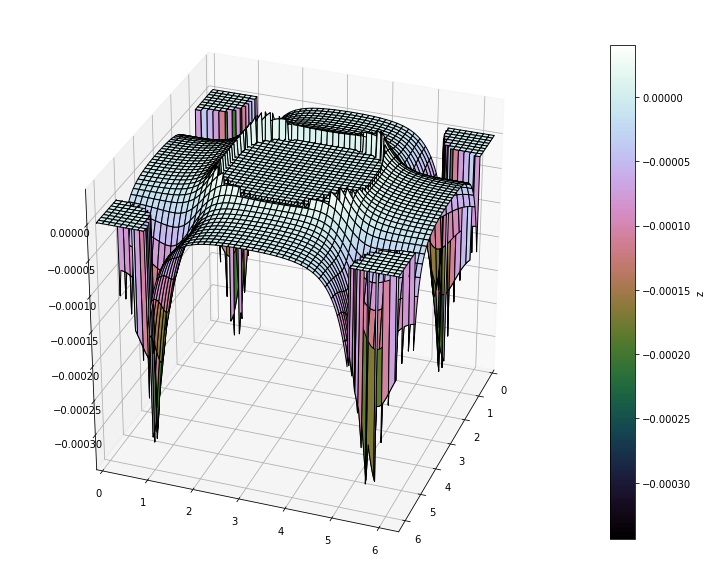

In [11]:
#instead of a colormap, a 3D plot
surface=hv.Surface(fermi_surface_atm_pb(evsmat,0,0,0)[0],bounds=(0,0,2*np.pi,2*np.pi))
surface.options(fig_size=350,colorbar=True,azimuth=20,cmap='cubehelix',linewidth=1,edgecolor='black',labelled=[])

In [12]:
def get_cdy(mzn,rangebn='all'):
    '''
    Calculate the anomalous conductivity for different values of magnetization.
    '''
    if rangebn=='all':
        rbn=[0,1,2,3,4,5] 
    else:
        rbn=rangebn
    cy=[]
    for ban in rbn:
        condy=fermi_surface_atm_pb(evsmat,mzn,ban)[1]
        cy.append(condy)
    return 1/(2*np.pi)*sum(cy)

In [13]:
def get_cdy_2(mzn,lev,rangebn='all'):
    '''
    Calculate the anomalous conductivity for different values of magnetization and Fermi level shift
    '''
    if rangebn=='all':
        rbn=[0,1,2,3,4,5] 
    else:
        rbn=rangebn
    cy=[]
    for ban in rbn:
        condy=fermi_surface_atm_pb(evsmat,mzn,ban,lev)[1]
        cy.append(condy)
    return 1/(2*np.pi)*sum(cy)

In [14]:
def gen_data():
    return [get_cdy(i) for i in range(len(evsmat[0]))]
bx=gen_data()

In [15]:
levels=[i for i in np.linspace(-2,2,81)]
def gen_data_2():
    return [[get_cdy_2(j,i) for i in levels] for j in range(len(evsmat[0]))]
bx_2=gen_data_2()

In [18]:
from scipy.interpolate import make_interp_spline, BSpline

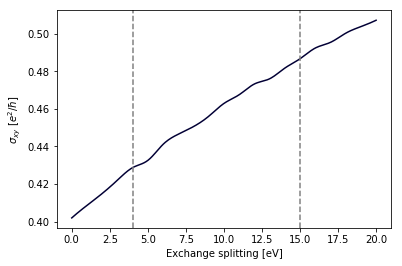

In [24]:
def plot_cdy(bx):
    fig, ax = plt.subplots()
    size=10
    xnew = np.linspace(0,20,300)
    spl = make_interp_spline(range(len(bx)), bx, k=3)
    cdy_smooth = spl(xnew)
    plt.plot(xnew,cdy_smooth,c='#020035')
    plt.axvline(x=4,linestyle='--',color='gray') 
    plt.axvline(x=15,linestyle='--',color='gray') 
    plt.xlabel('Exchange splitting [eV]')
    plt.ylabel('$\sigma_{xy}$ [$e^2/\hbar$]')
    plt.show()
plot_cdy(bx=bx_2[0])